# Script to assemble data from Bazzino and Roitman
This notebook will read in all files and save pickles with just stimulus associated signals

In [1]:
from pathlib import Path
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tdt
import trompy as tp

import dill

In [2]:
DATAFOLDER = Path("..//data")
TANKFOLDER = Path("D://TestData//bazzino//to McCutcheon from Paula Bazzino")

# SubjectKey files give sex of rat

metadata = pd.read_csv(DATAFOLDER / "10NaCl_FileKey.csv")

read from t=0s to t=2653.25s


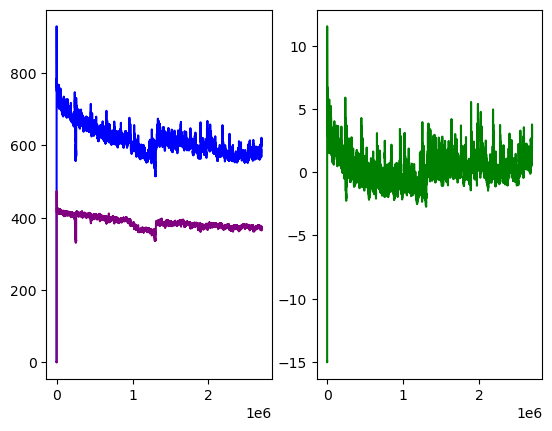

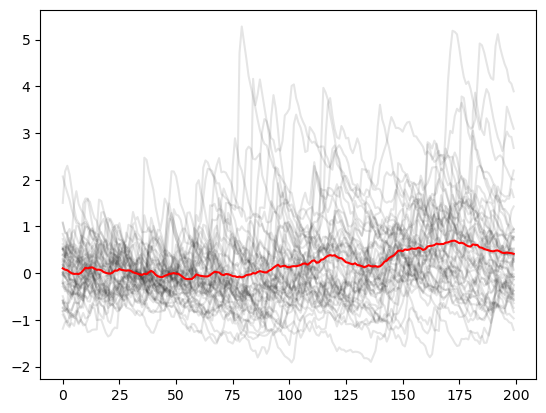

In [10]:
# this function should get snips from the tank
# should add pre, post and other functions
def get_snips(tank, showfigs=False):
    # preprocess streams
    
    data = tdt.read_block(tank)
    blue = data.streams["x65A"].data
    uv = data.streams["x05A"].data
    fs = data.streams["x05A"].fs
    
    filtered_sig = tp.processdata(blue, uv, fs=fs)
    
    if showfigs:
        f, ax = plt.subplots(ncols=2)
        ax[0].plot(blue, color="blue")
        ax[0].plot(uv, color="purple")
        ax[1].plot(filtered_sig, color="green")
    
    # get epochs
    sol = data.epocs.sol_.onset
    
    #make snips
    snips = tp.snipper(filtered_sig, sol, fs=fs, pre=5, post=15, bins=200)[0]
    
    if showfigs:
        f, ax = plt.subplots()
        for snip in snips:
            ax.plot(snip, color="black", alpha=0.1)
        ax.plot(np.mean(snips, axis=0), color="red")
    
    # baseline correction
    # and maybe scale them so they all go between -1 and 1 based on the same parameters
    
    # return snips
    return snips
    
# code to test get_snips function
tank = TANKFOLDER / "PB23-220601-142444"
data = get_snips(tank, showfigs=True)
# plt.plot(data[0])
# plt.plot(np.mean(data, axis=0))

# f, ax = plt.subplots()
# for snip in data:
#     ax.plot(snip, color="black", alpha=0.1)

# ax.plot(np.mean(data, axis=0), color="red")
    

D:\TestData\bazzino\to McCutcheon from Paula Bazzino\PB23-220608-131619
read from t=0s to t=2614.16s
49
D:\TestData\bazzino\to McCutcheon from Paula Bazzino\PB24-220608-122638
read from t=0s to t=2643.15s
49
D:\TestData\bazzino\to McCutcheon from Paula Bazzino\PB33-220620-115414
read from t=0s to t=2616.75s
49
D:\TestData\bazzino\to McCutcheon from Paula Bazzino\PB39-220629-105034
read from t=0s to t=2679.85s
49
D:\TestData\bazzino\to McCutcheon from Paula Bazzino\PB391-220829-111452
read from t=0s to t=2683.06s
50
D:\TestData\bazzino\to McCutcheon from Paula Bazzino\PB44-220829-121005
read from t=0s to t=2629.05s
50
D:\TestData\bazzino\to McCutcheon from Paula Bazzino\PB61-221024-110730
read from t=0s to t=2626.98s
49
D:\TestData\bazzino\to McCutcheon from Paula Bazzino\PB62-221024-120029
read from t=0s to t=2606.66s
49
D:\TestData\bazzino\to McCutcheon from Paula Bazzino\PB64-221024-143444
read from t=0s to t=2637.56s
50
D:\TestData\bazzino\to McCutcheon from Paula Bazzino\PB70-22102

C:\Users\jmc010\AppData\Local\Temp\ipykernel_22008\3923105679.py:14: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  f, ax = plt.subplots(ncols=2)


49
D:\TestData\bazzino\to McCutcheon from Paula Bazzino\PB24-220601-133332
read from t=0s to t=2674.15s
49
D:\TestData\bazzino\to McCutcheon from Paula Bazzino\PB33-220614-133339
read from t=0s to t=2676.26s
49
D:\TestData\bazzino\to McCutcheon from Paula Bazzino\PB39-220627-104923
read from t=0s to t=2689.75s
49
D:\TestData\bazzino\to McCutcheon from Paula Bazzino\PB391-220826-104731
read from t=0s to t=2610.98s
50
D:\TestData\bazzino\to McCutcheon from Paula Bazzino\PB44-220826-113745
read from t=0s to t=2648.56s


c:\Users\jmc010\AppData\Local\mambaforge\envs\default\lib\site-packages\tdt\TDTbin2py.py:1437: Warning: sss/ buddy epoc not found, skipping
  warnings.warn(epocs.buddies[ii] + ' buddy epoc not found, skipping', Warning)


49
D:\TestData\bazzino\to McCutcheon from Paula Bazzino\PB61-221022-094209
read from t=0s to t=2651.47s
49
D:\TestData\bazzino\to McCutcheon from Paula Bazzino\PB62-221022-103215
read from t=0s to t=2638.67s
49
D:\TestData\bazzino\to McCutcheon from Paula Bazzino\PB64-221022-112221
read from t=0s to t=2673.06s
49
D:\TestData\bazzino\to McCutcheon from Paula Bazzino\PB70-221022-121226
read from t=0s to t=2531.26s
49
D:\TestData\bazzino\to McCutcheon from Paula Bazzino\PB39-220705-114000
read from t=0s to t=2660.96s
49
D:\TestData\bazzino\to McCutcheon from Paula Bazzino\PB391-220902-105101
read from t=0s to t=2604.58s
49
D:\TestData\bazzino\to McCutcheon from Paula Bazzino\PB44-220902-114732
read from t=0s to t=2630.1s
50
D:\TestData\bazzino\to McCutcheon from Paula Bazzino\PB61-221027-091856
read from t=0s to t=2579.46s
49
D:\TestData\bazzino\to McCutcheon from Paula Bazzino\PB62-221027-100635
read from t=0s to t=2618.06s
49
D:\TestData\bazzino\to McCutcheon from Paula Bazzino\PB64-221

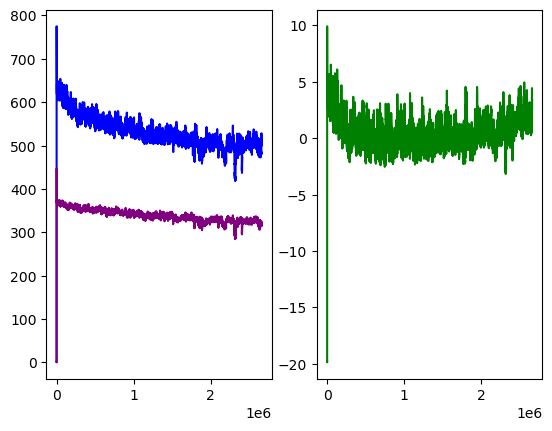

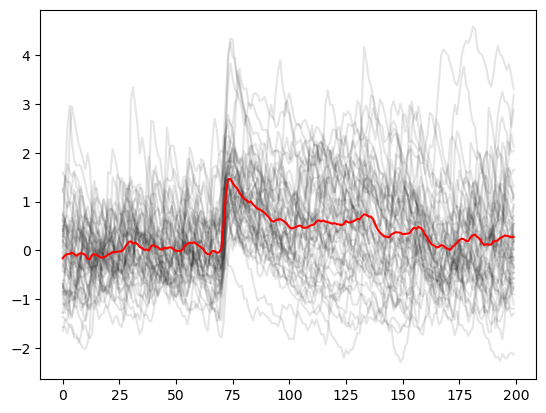

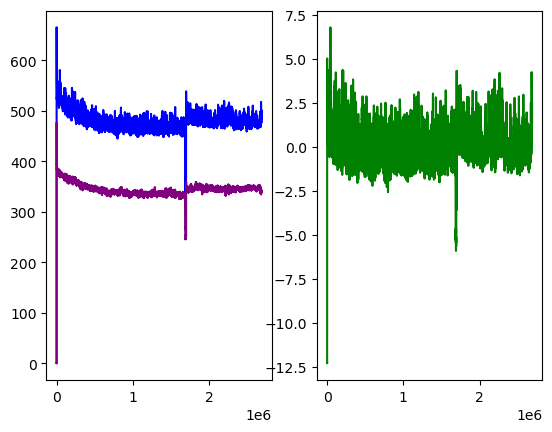

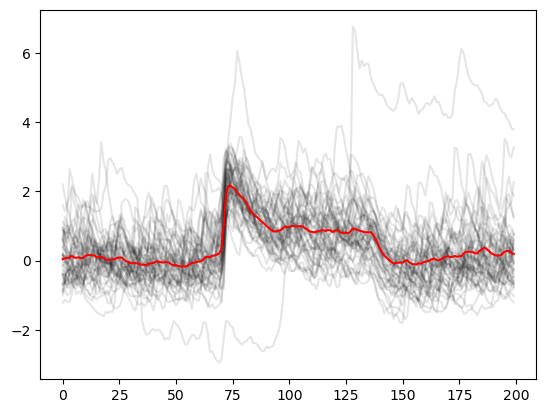

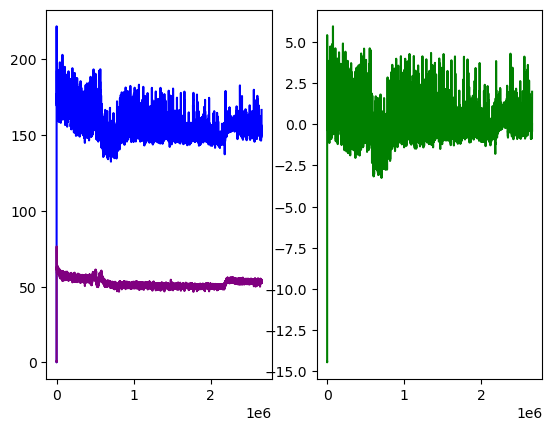

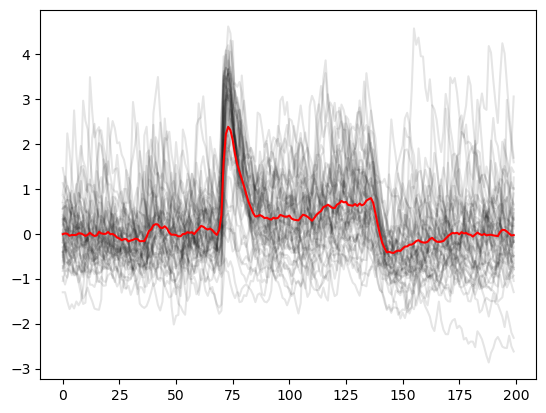

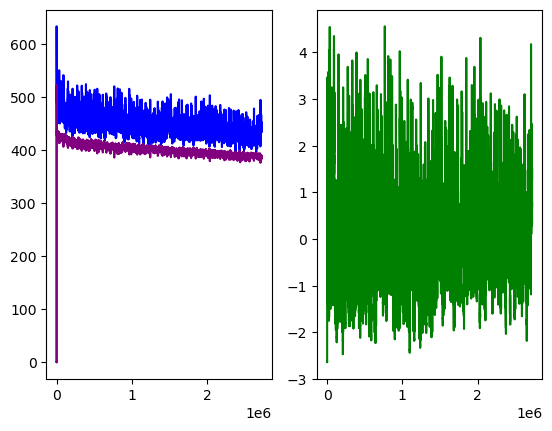

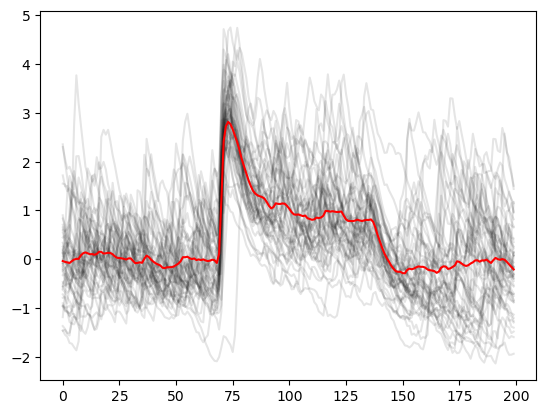

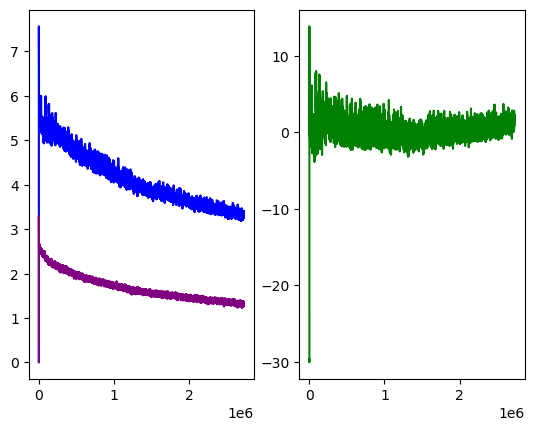

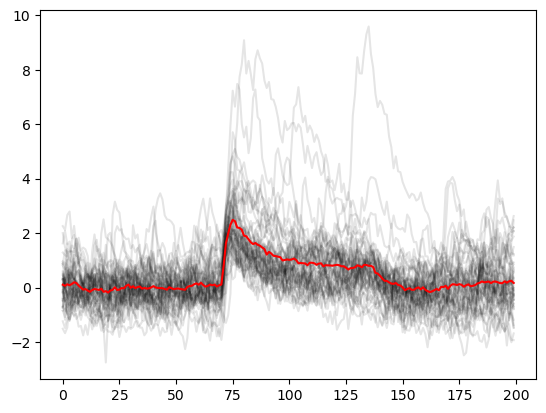

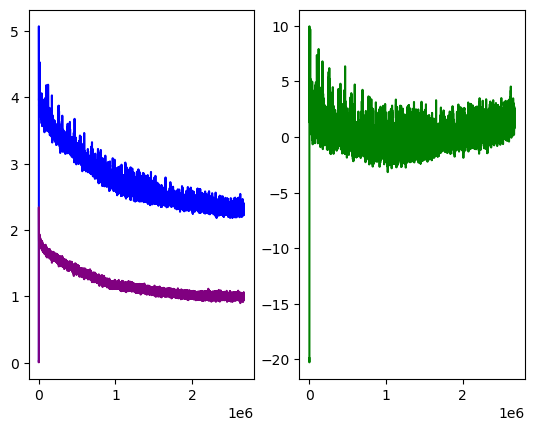

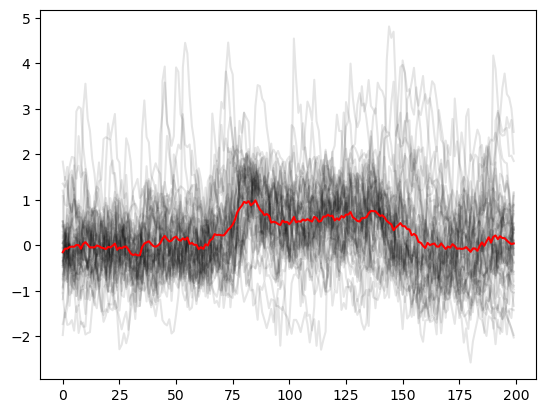

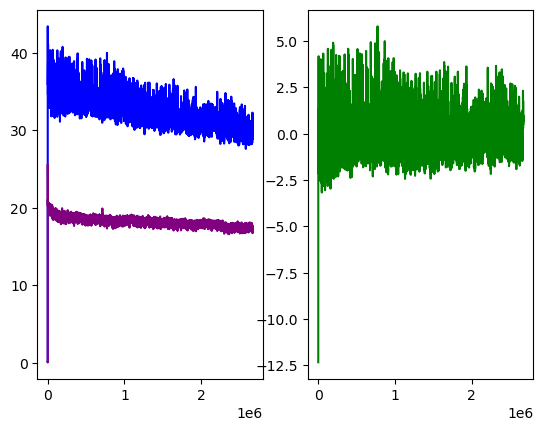

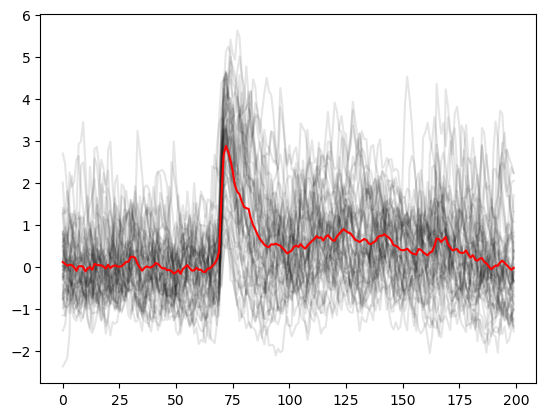

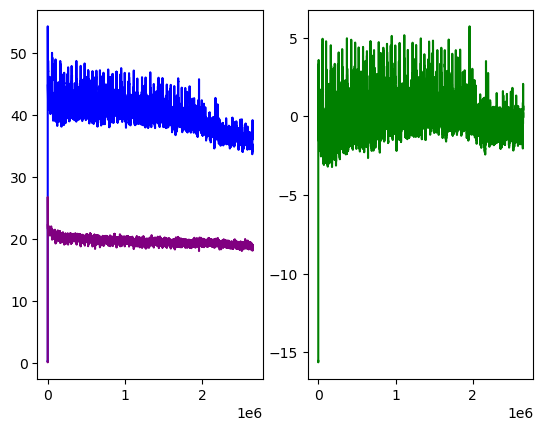

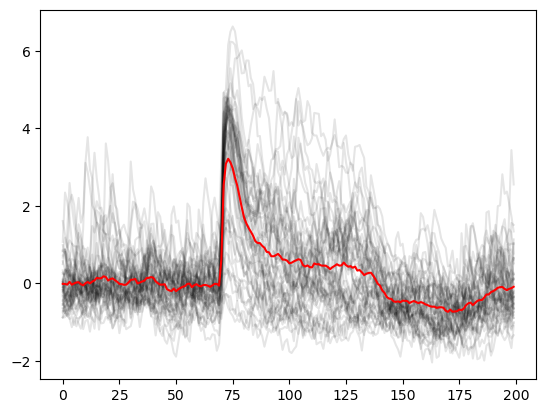

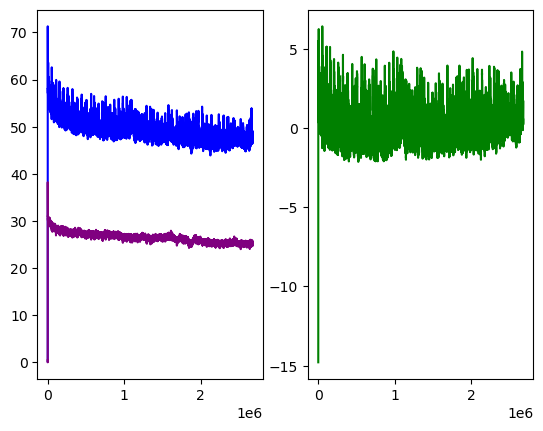

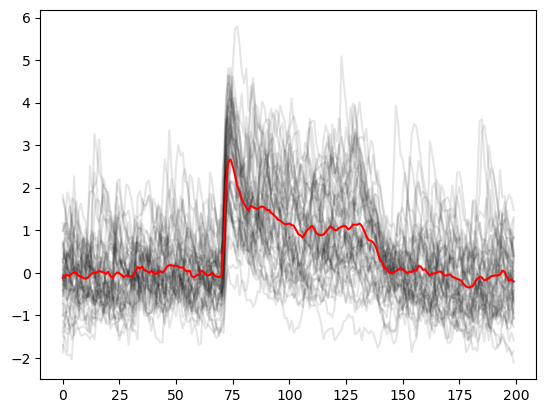

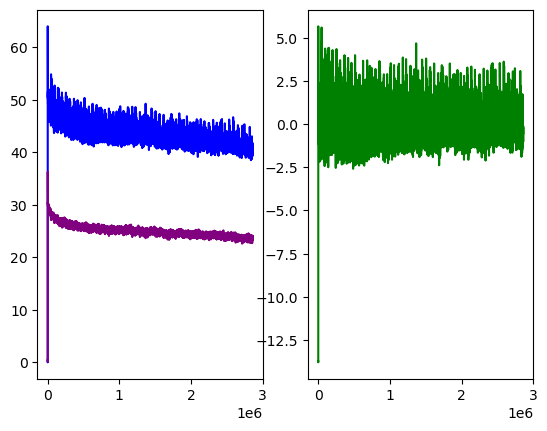

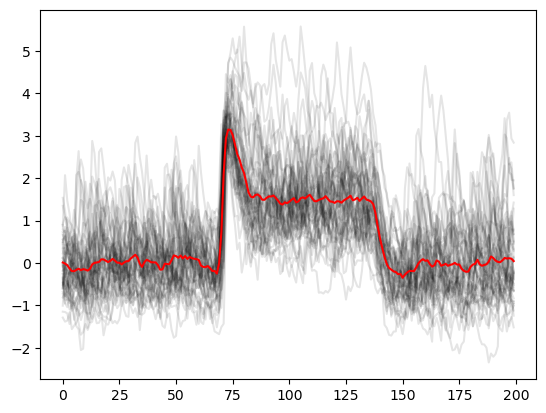

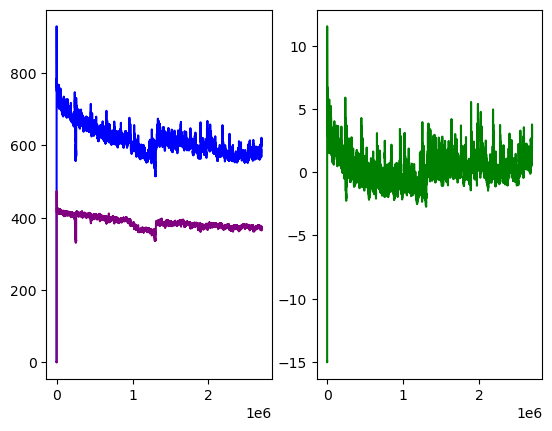

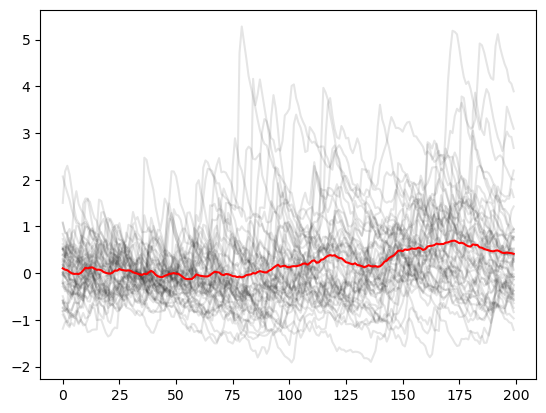

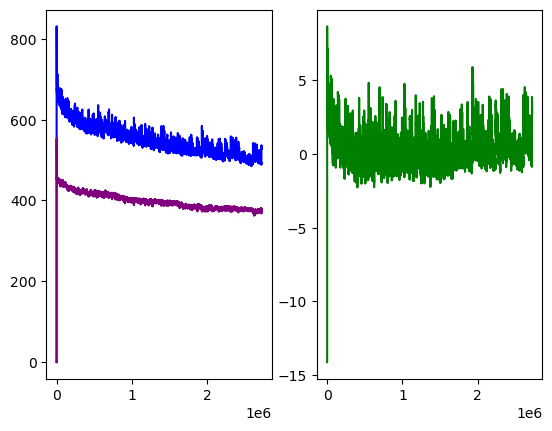

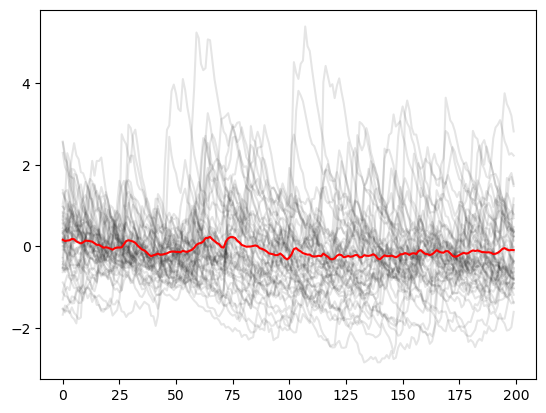

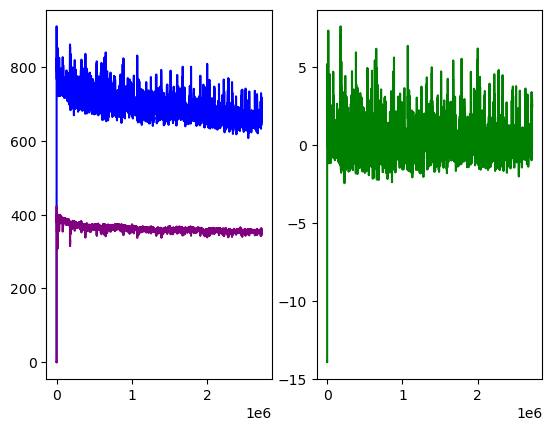

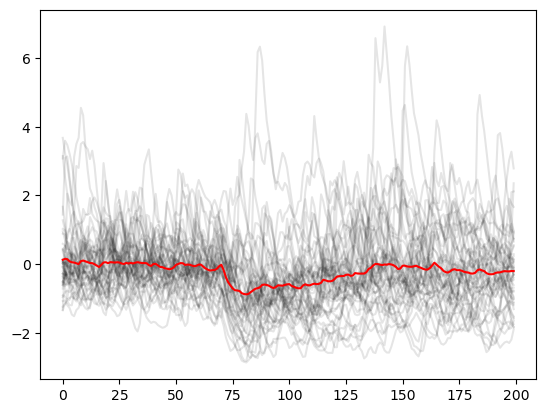

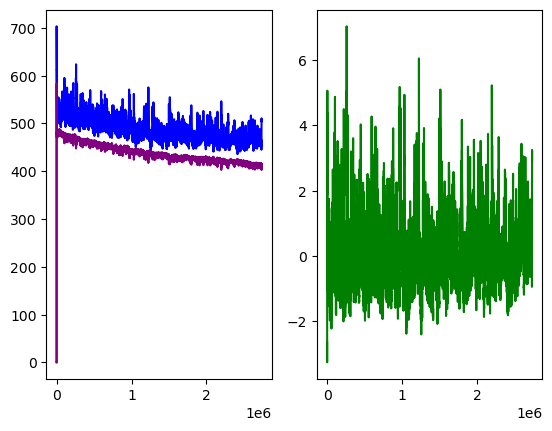

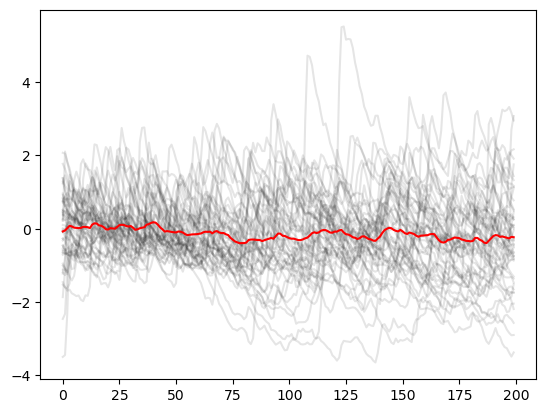

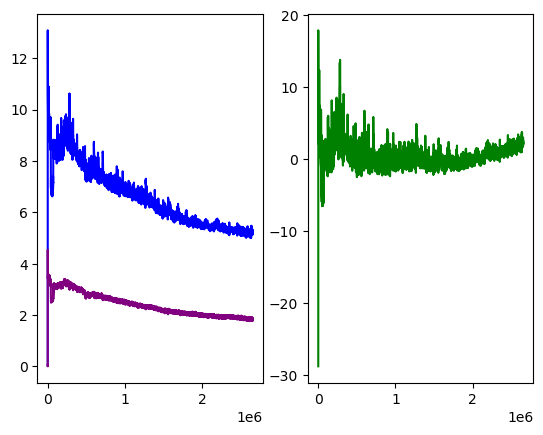

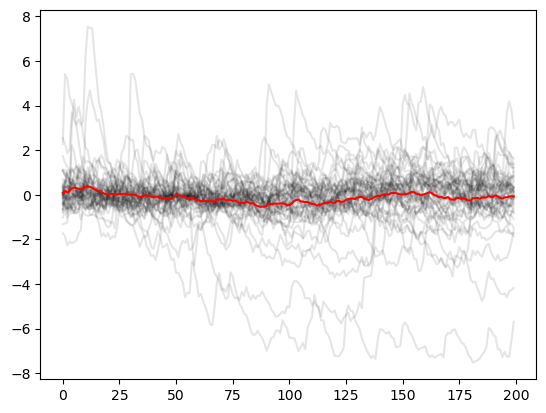

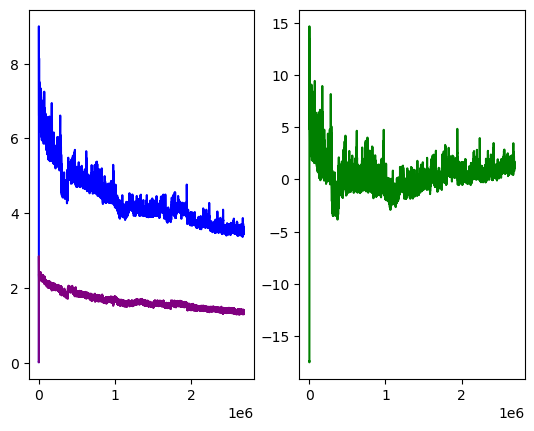

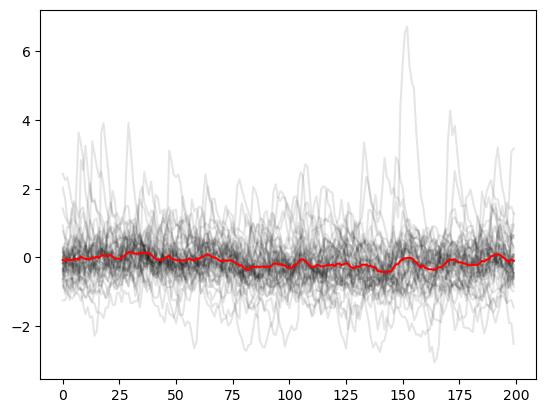

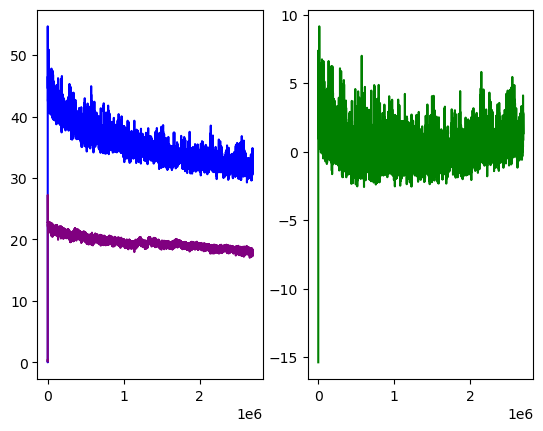

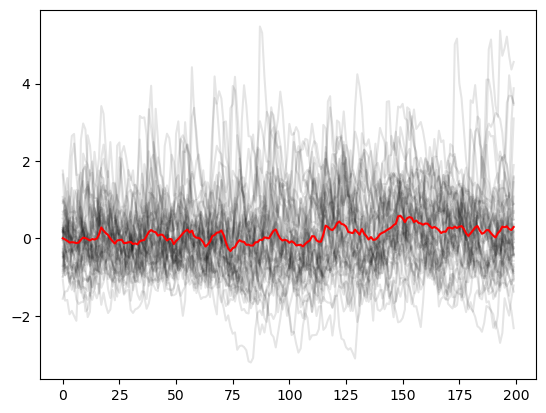

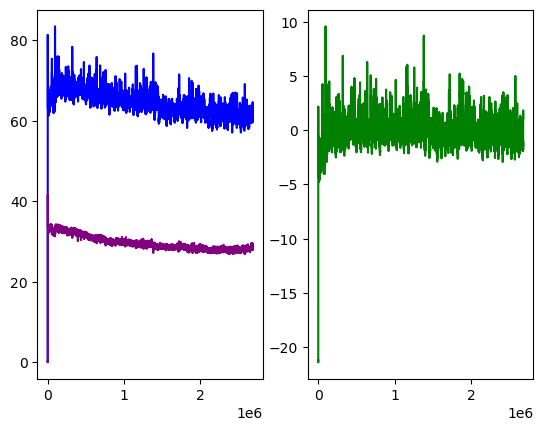

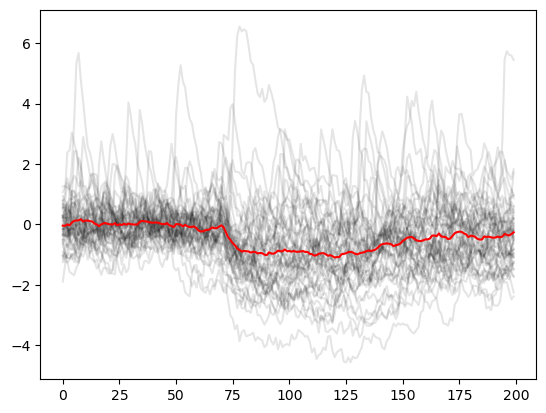

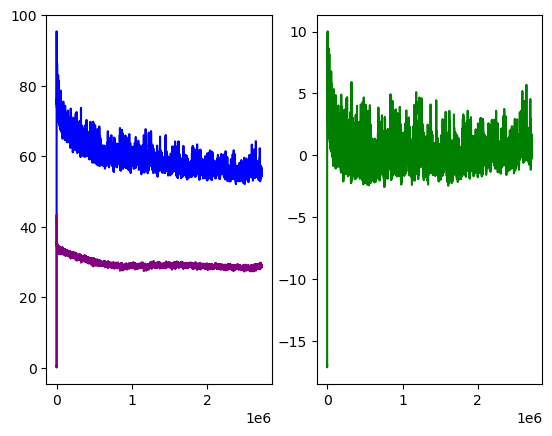

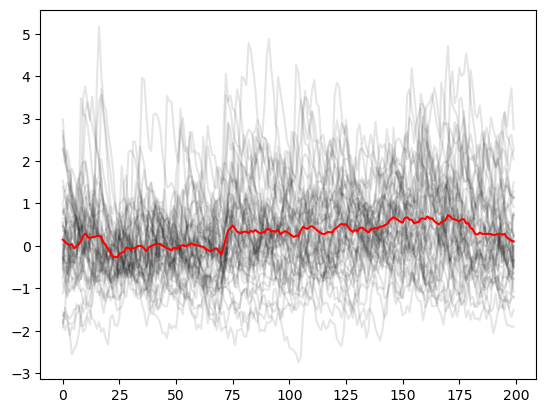

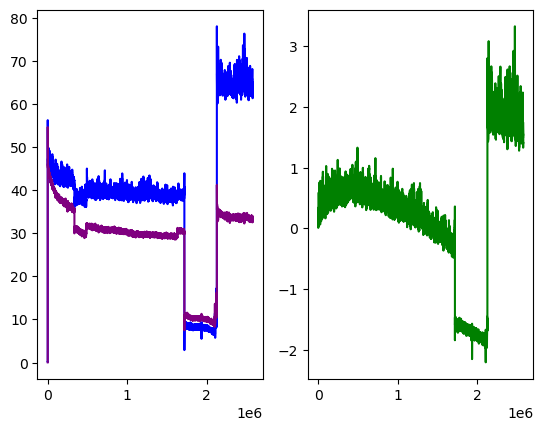

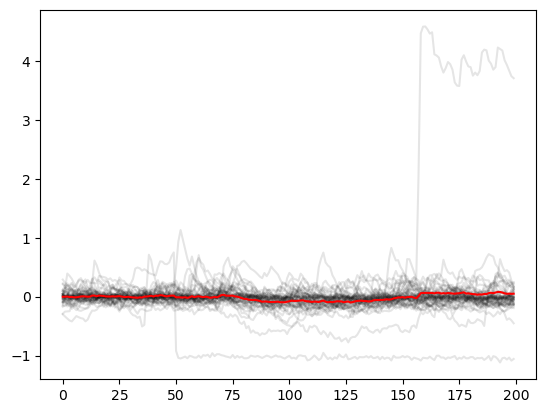

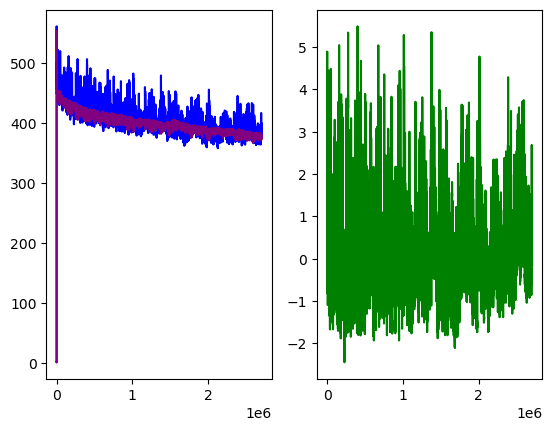

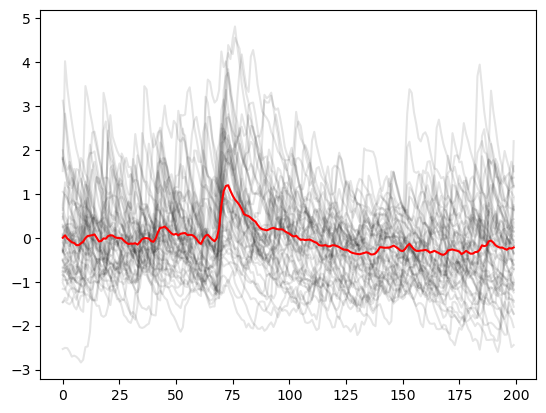

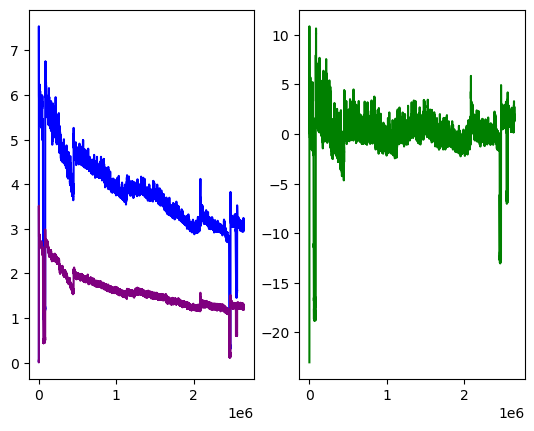

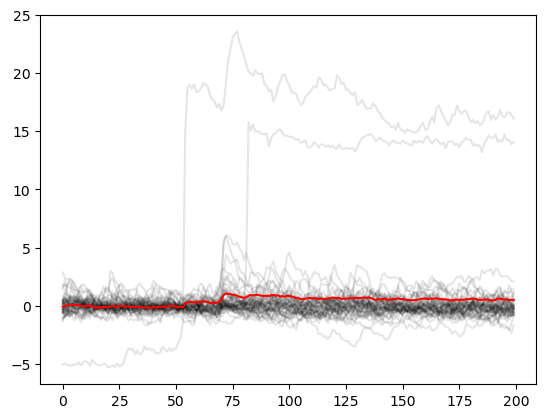

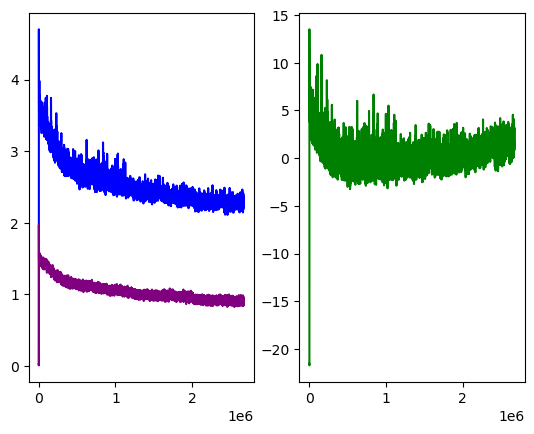

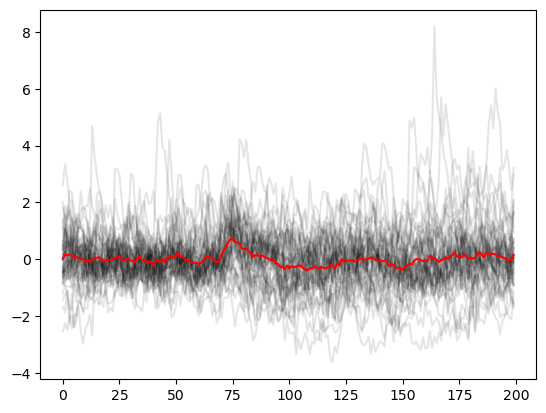

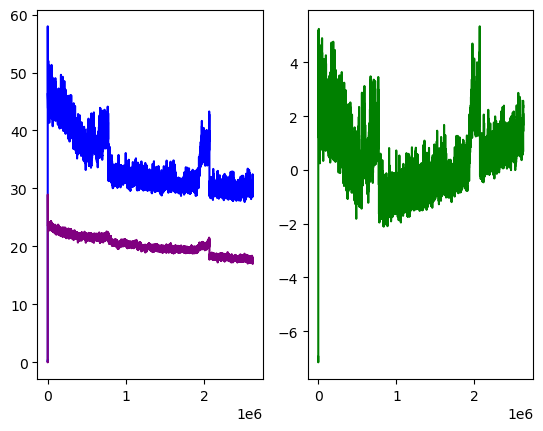

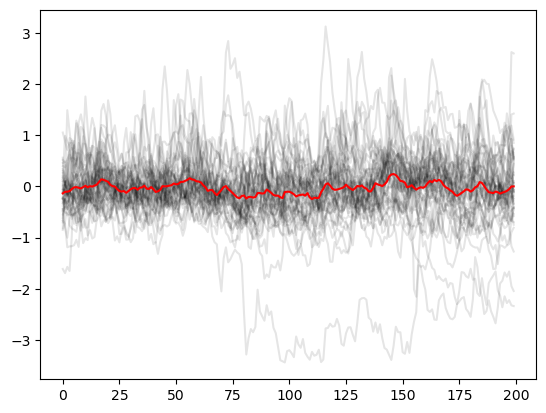

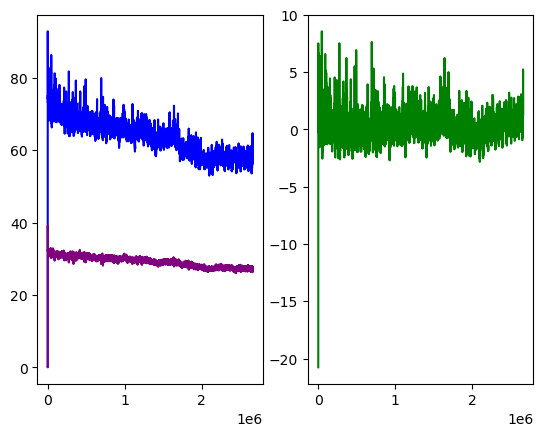

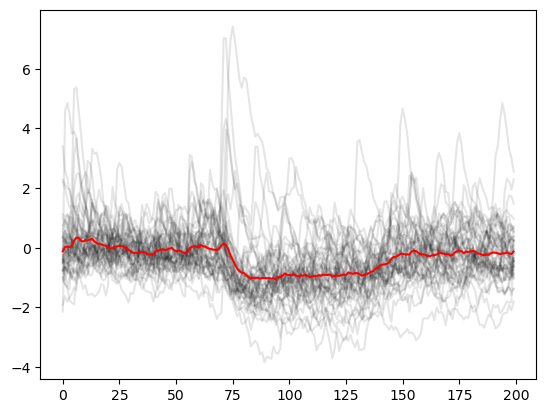

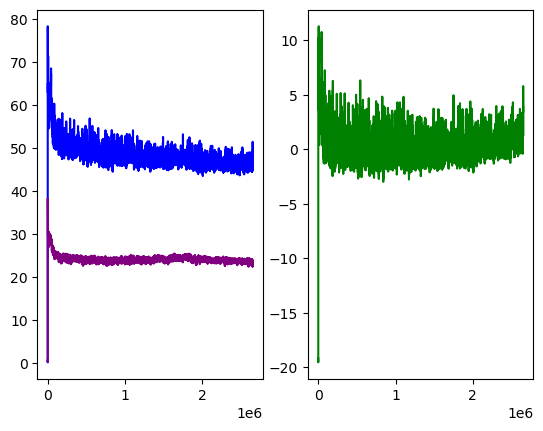

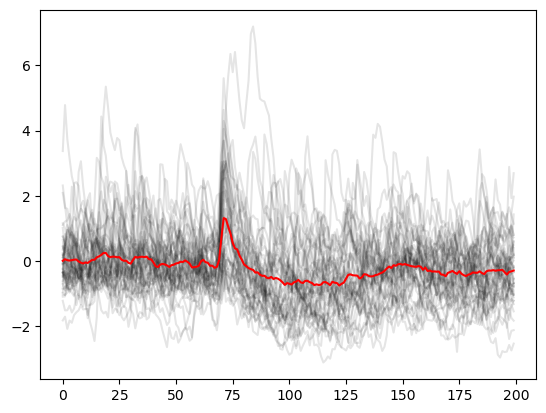

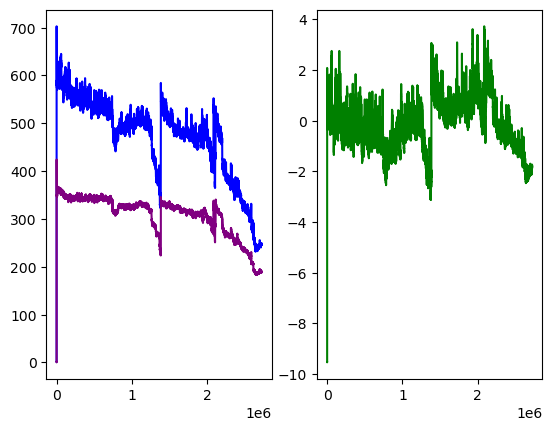

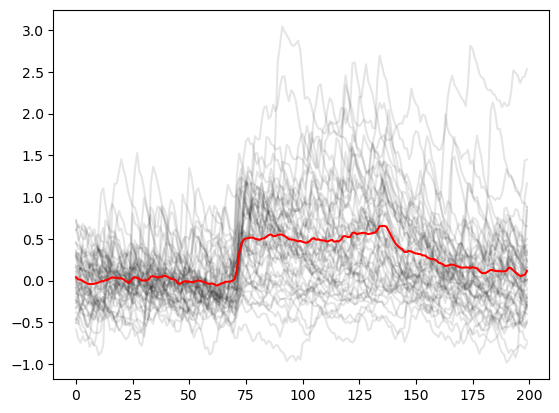

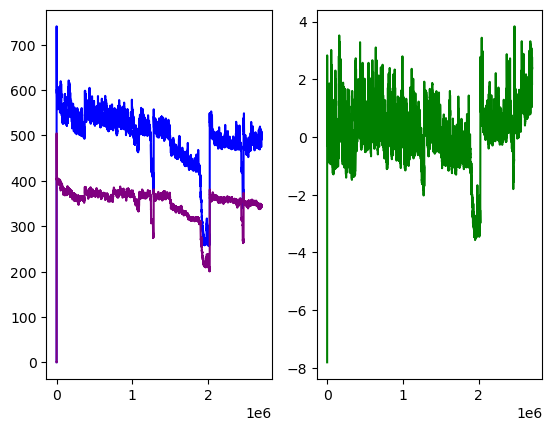

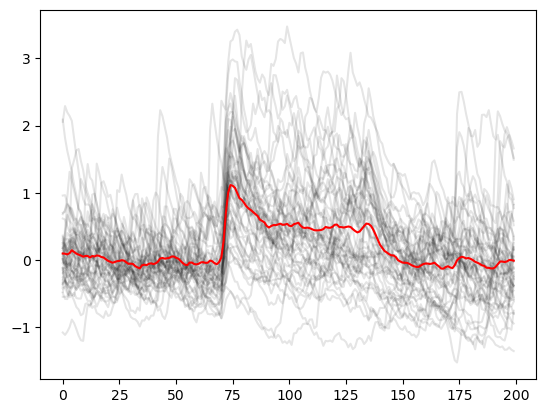

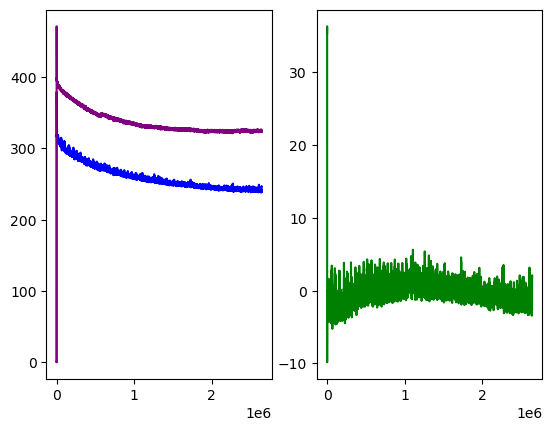

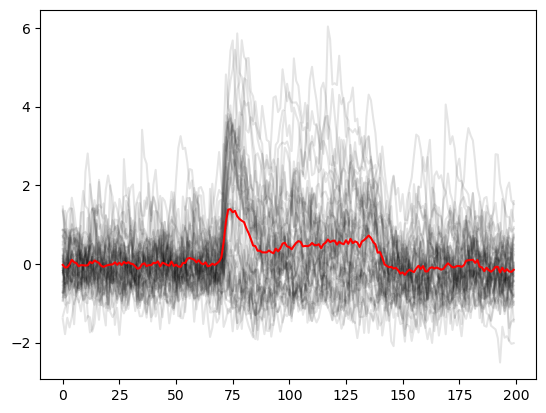

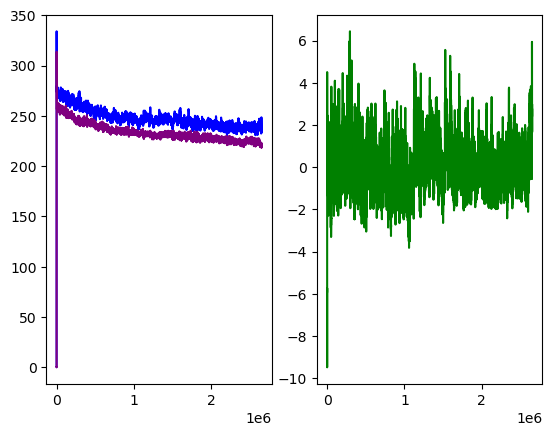

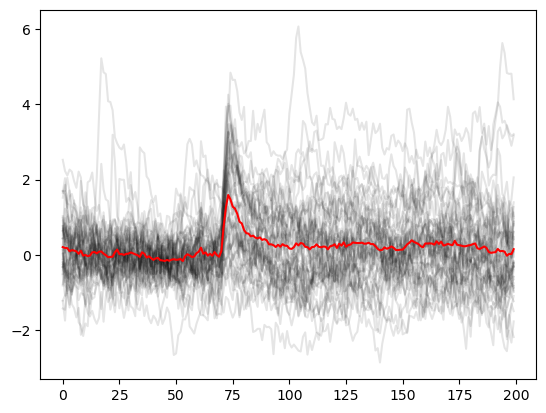

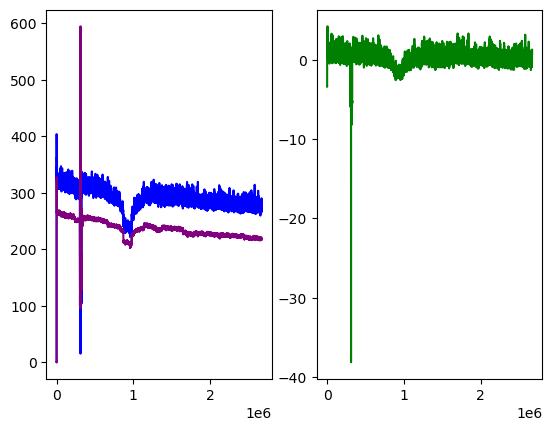

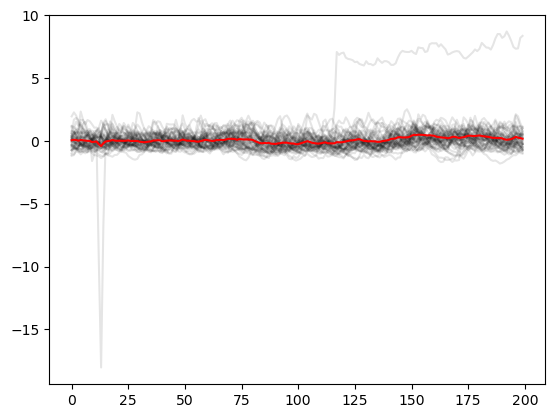

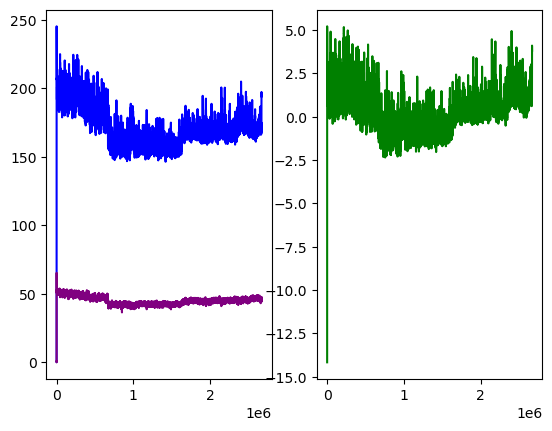

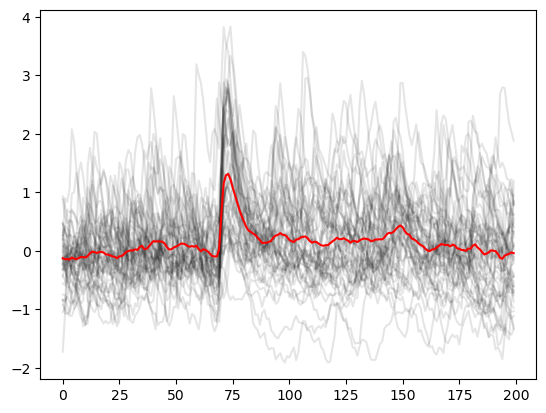

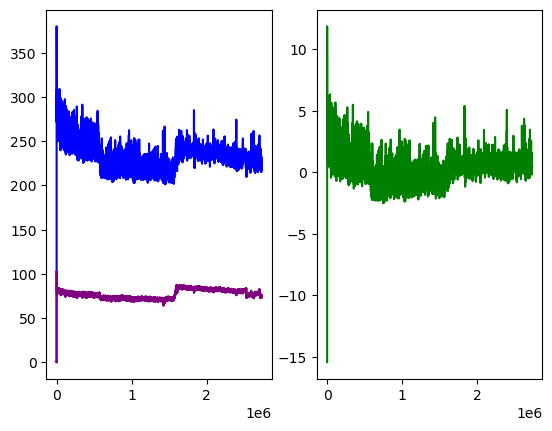

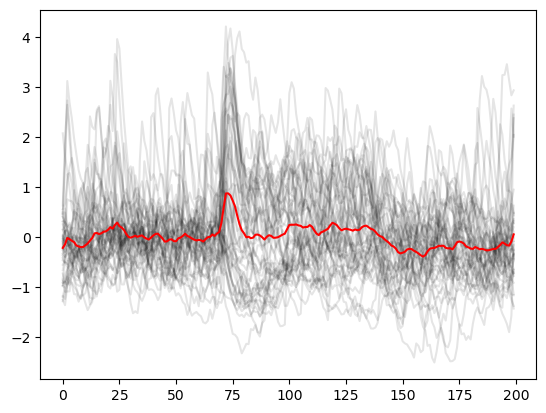

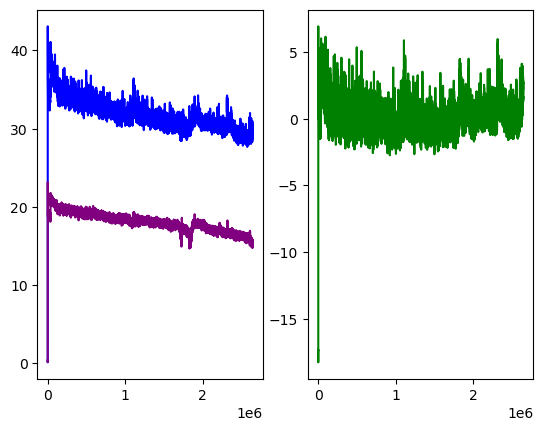

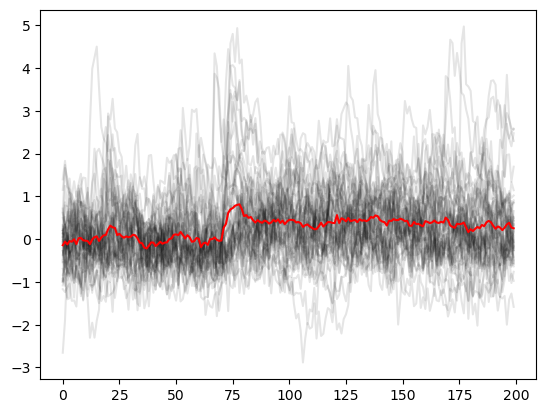

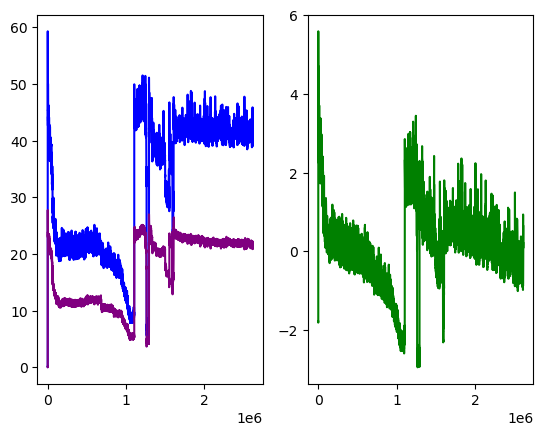

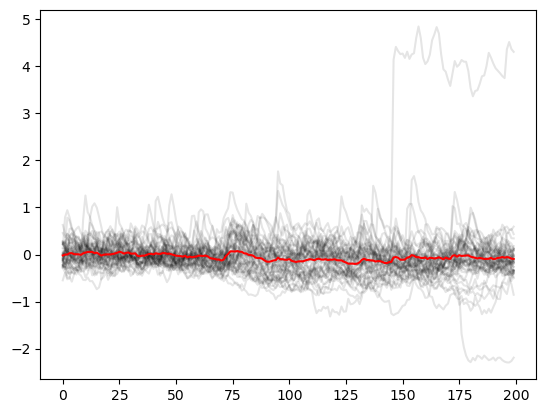

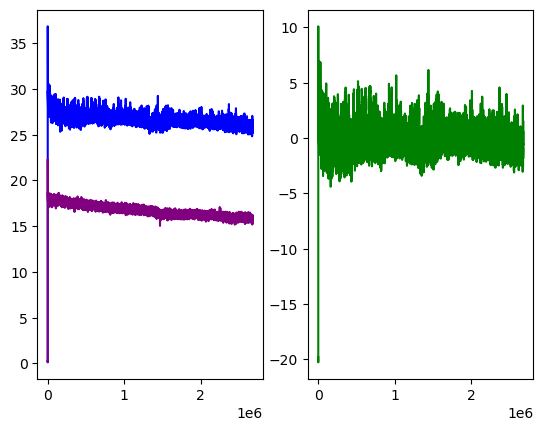

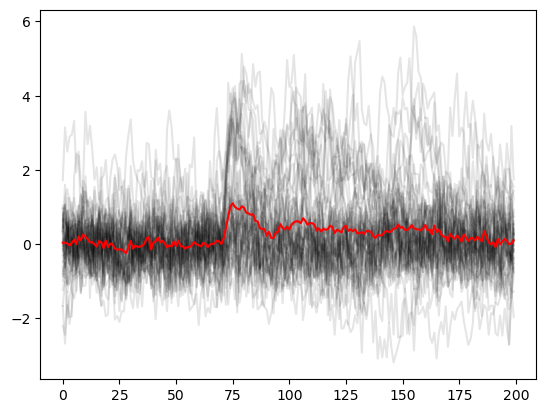

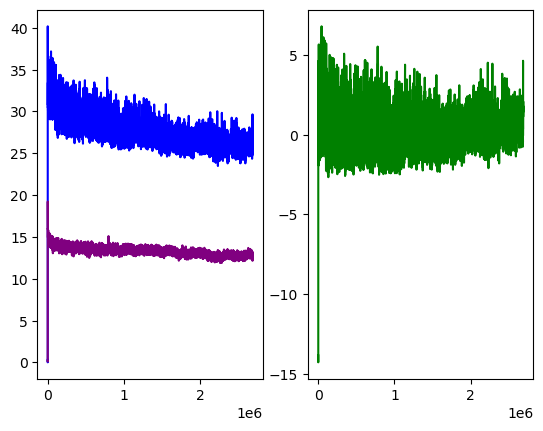

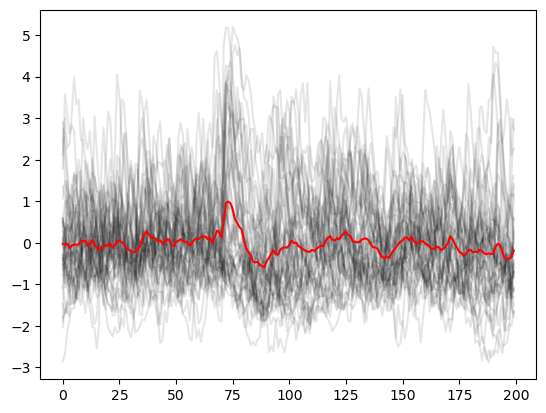

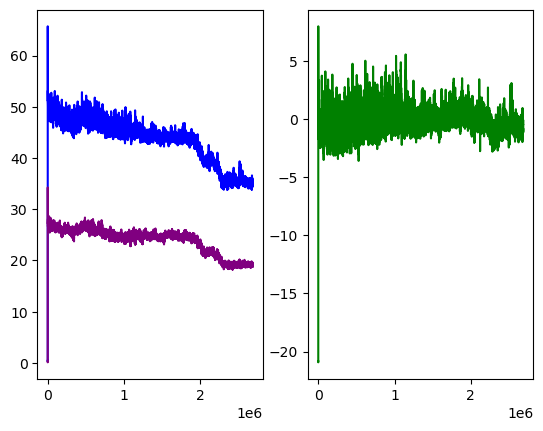

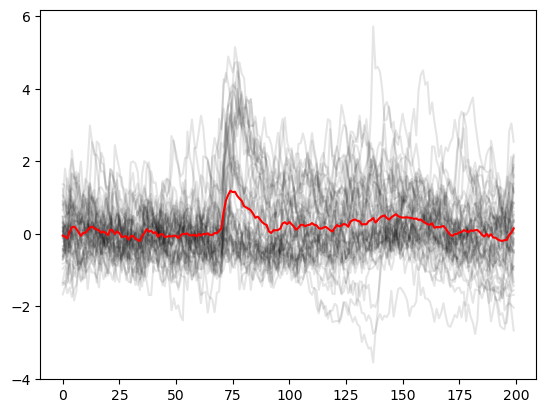

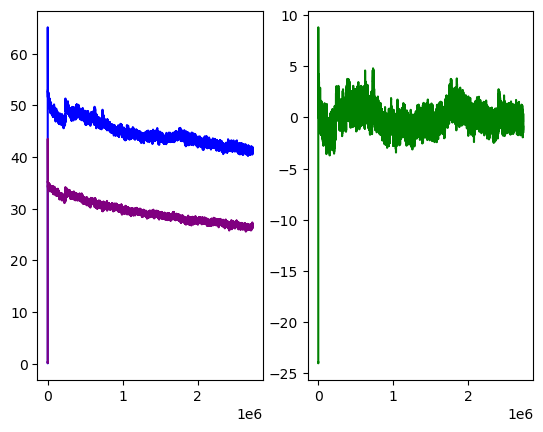

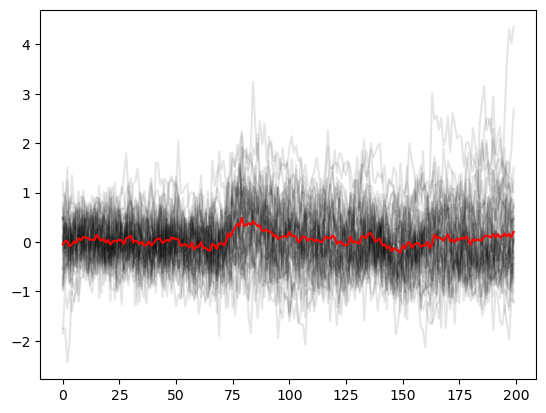

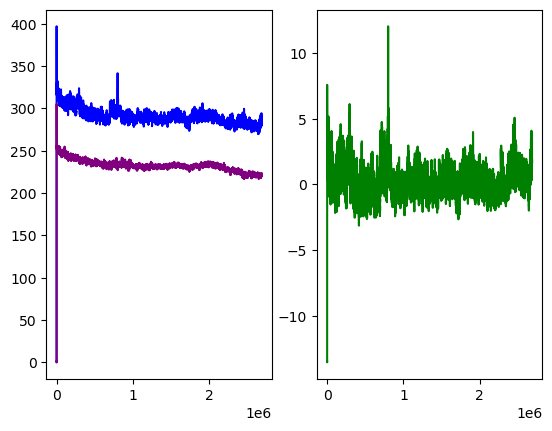

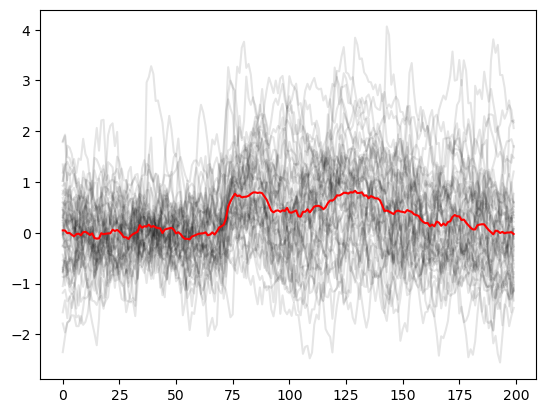

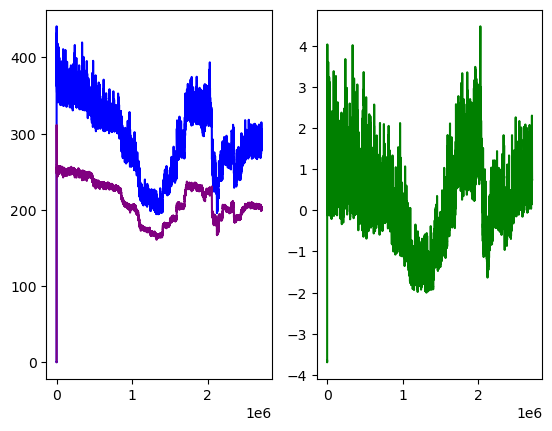

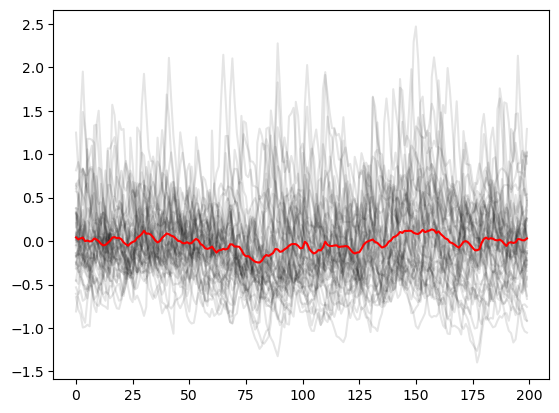

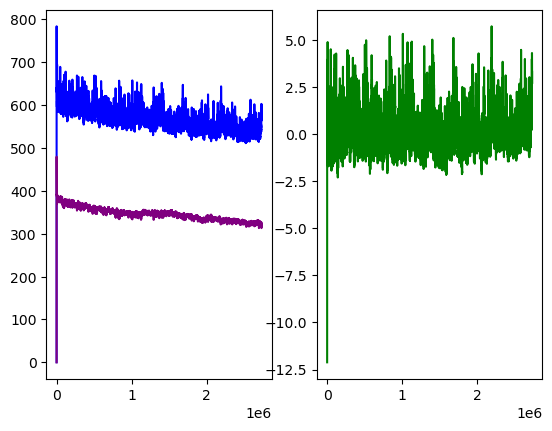

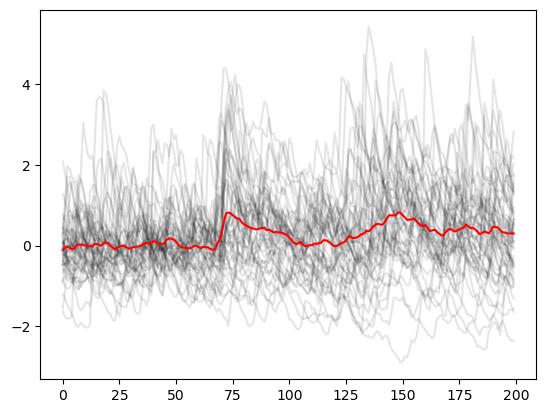

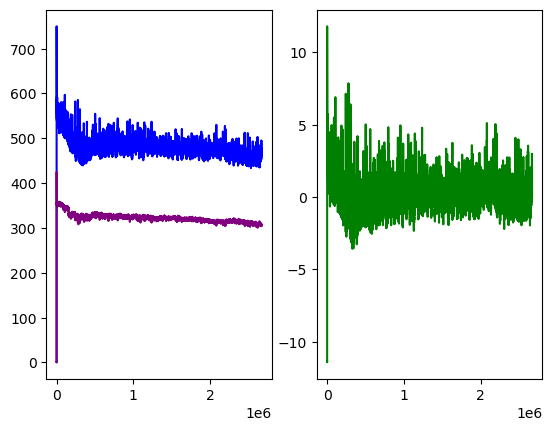

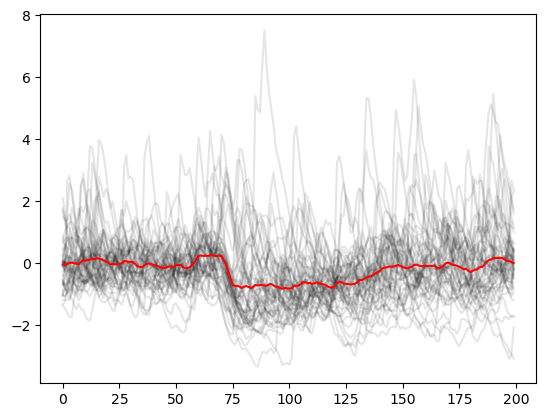

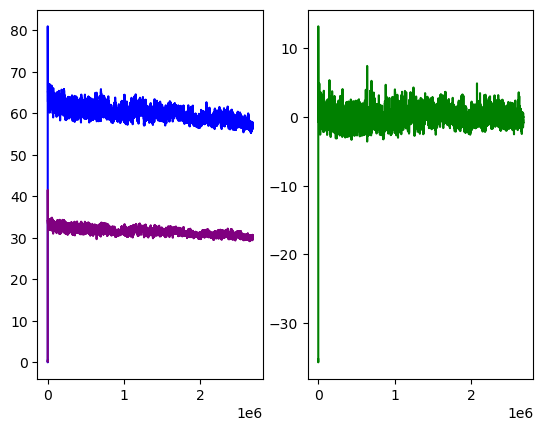

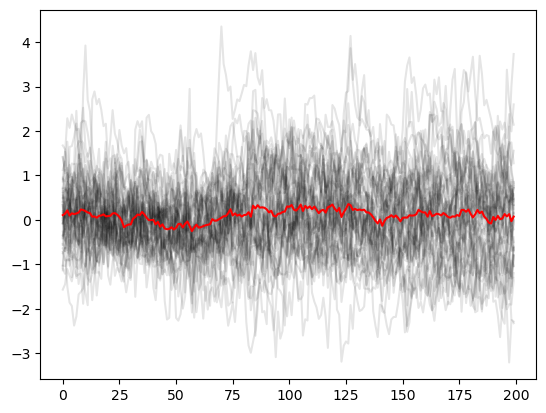

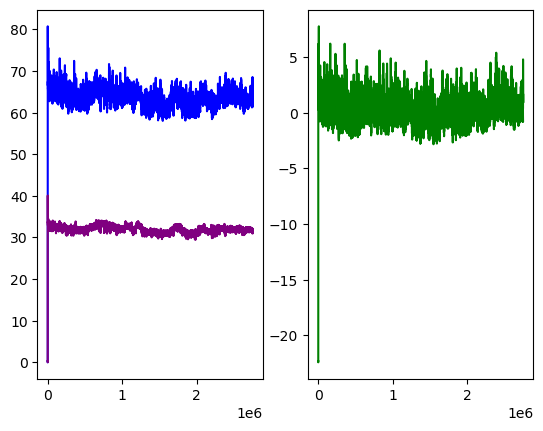

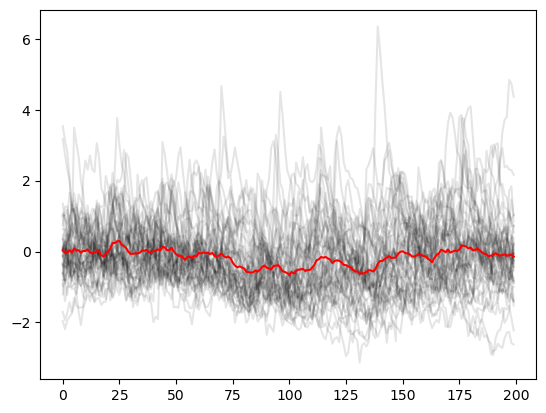

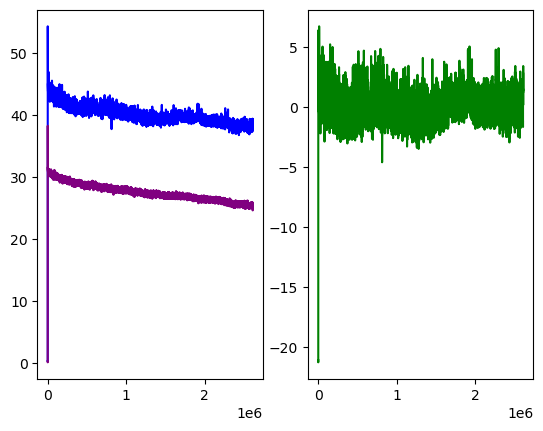

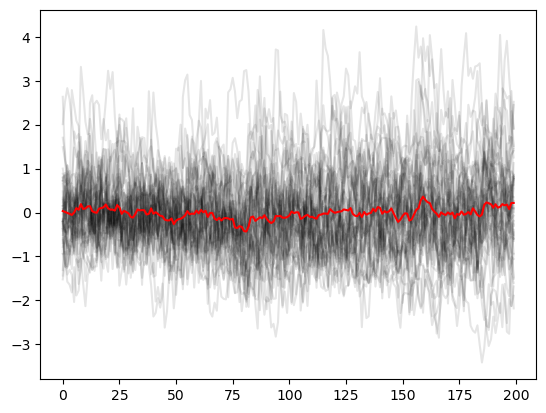

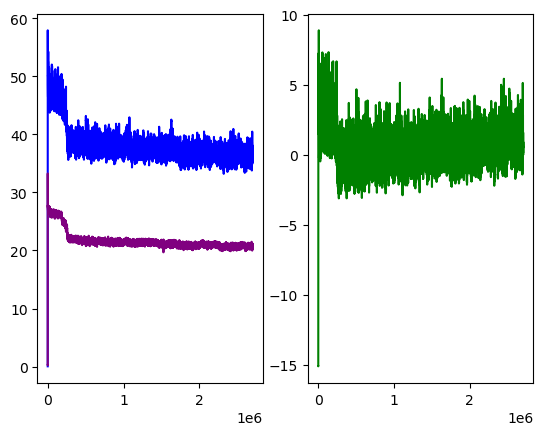

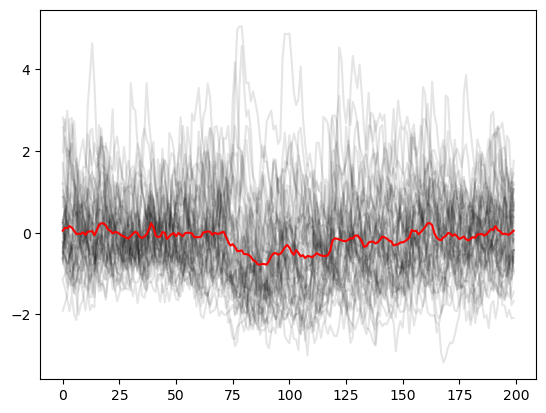

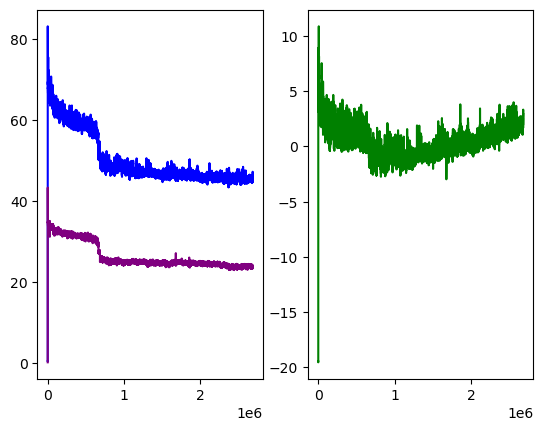

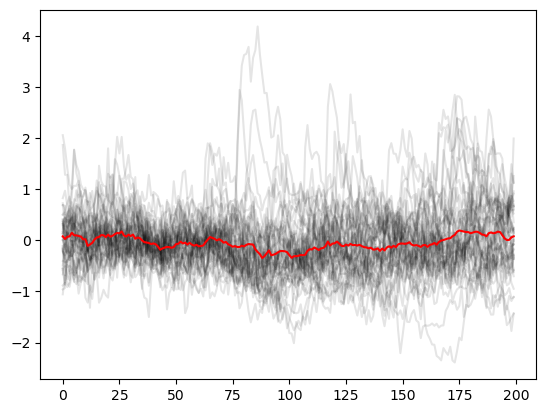

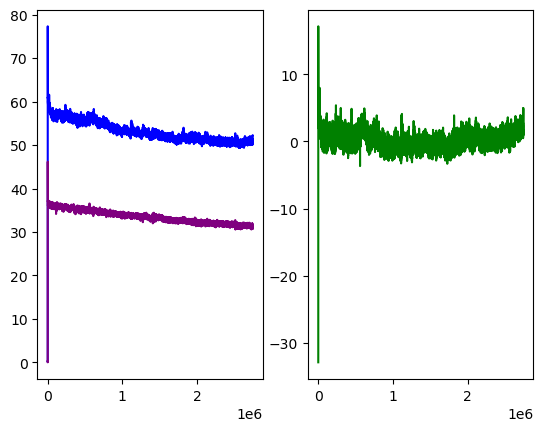

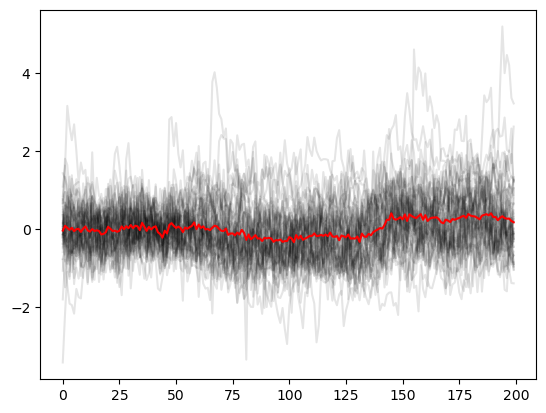

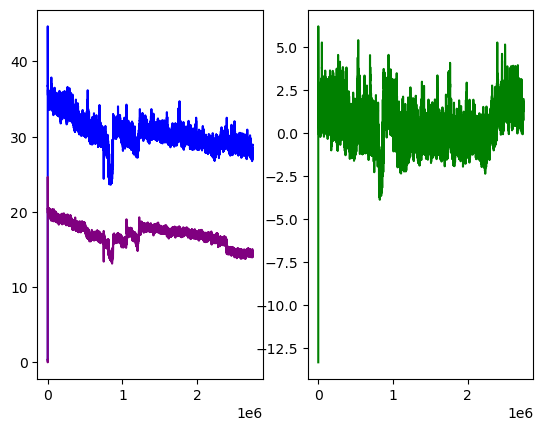

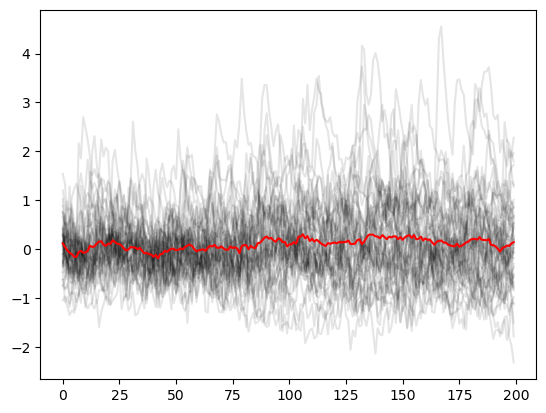

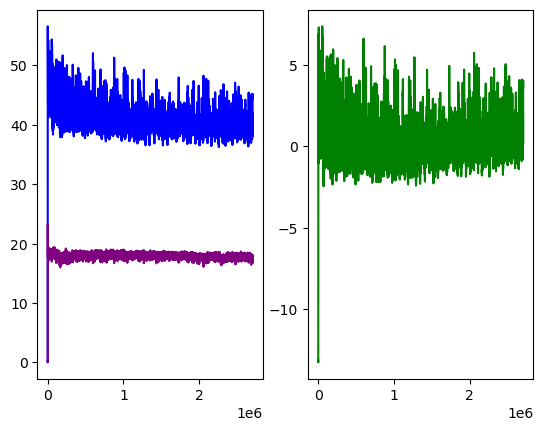

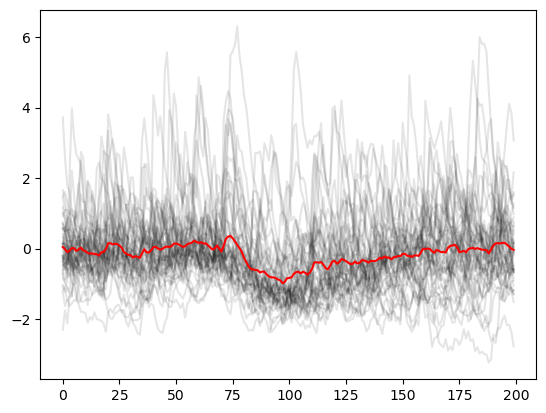

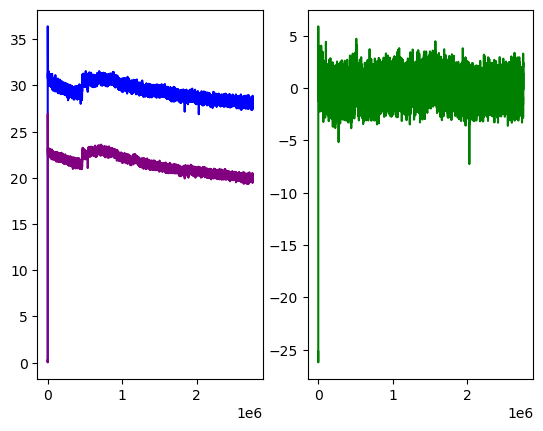

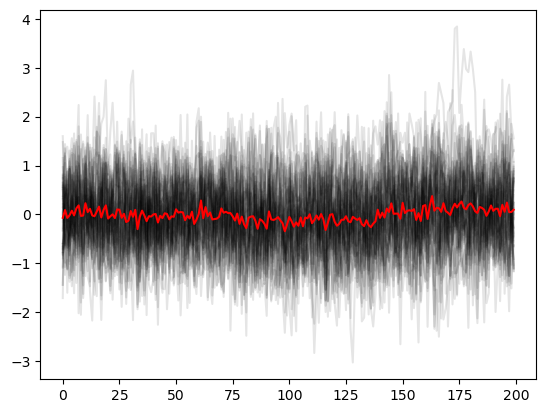

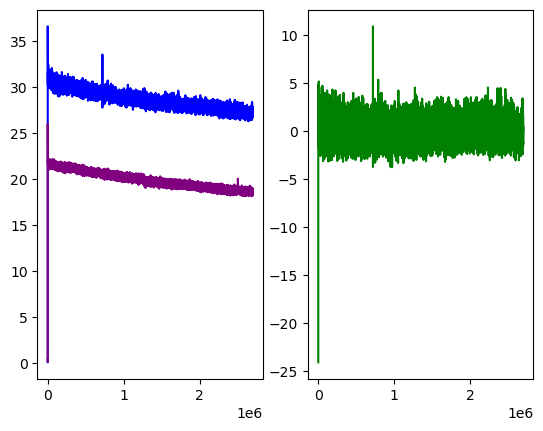

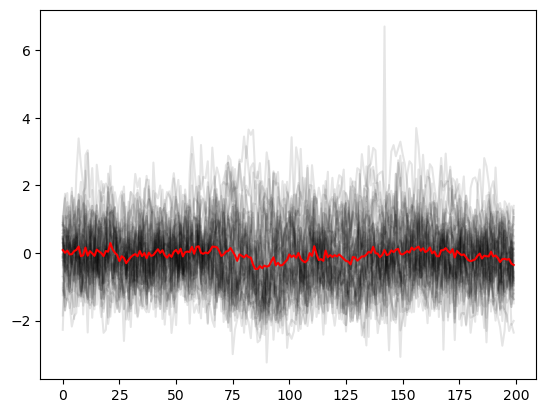

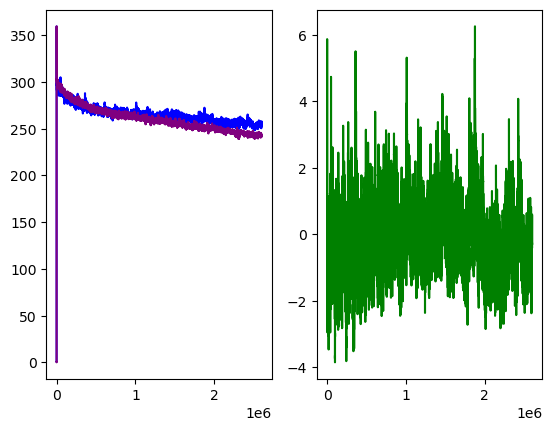

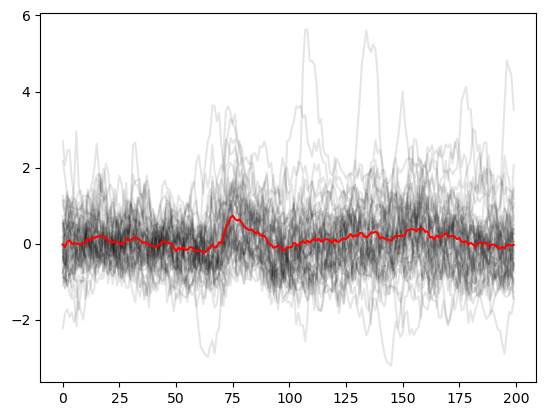

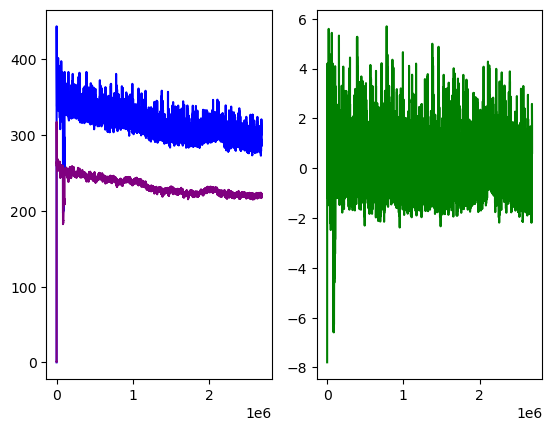

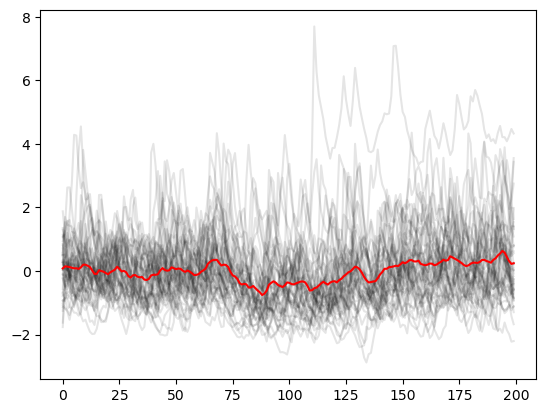

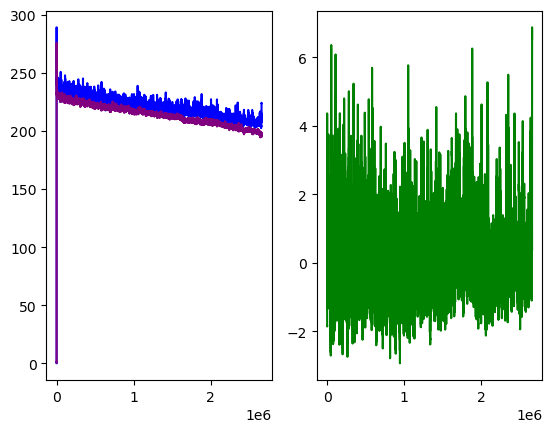

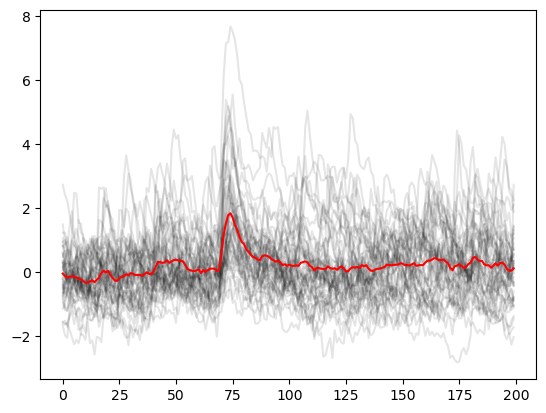

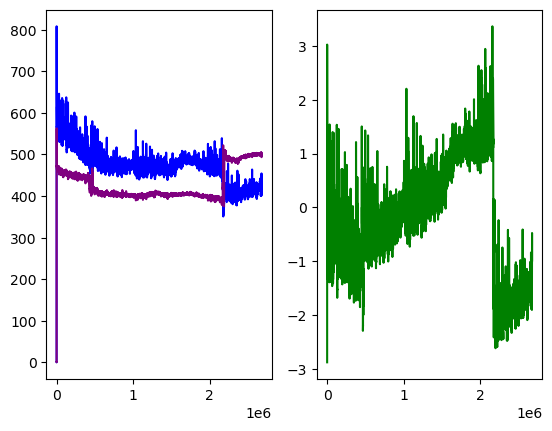

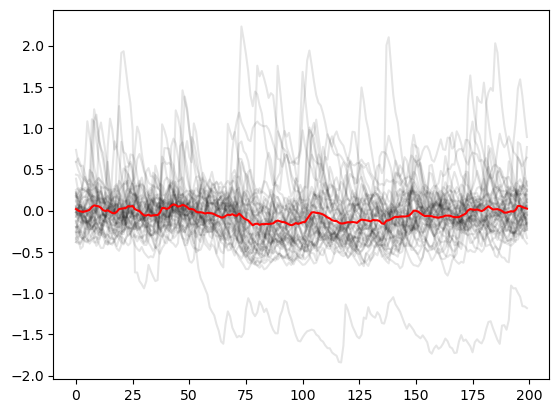

In [11]:
# also make accompanying df that contains details of the rat and the condition and the time in session

def assemble_all_data(csv_path, tank_folder):
    metadata = pd.read_csv(csv_path)
    
    snips_array = []
    x_array = []
    
    for row in metadata.iterrows():
        tank = tank_folder / row[1]["Folder"]
        print(tank)
        try:
            snips_tmp = get_snips(tank, showfigs=True)
            nsnips = len(snips_tmp)
            print(nsnips)
            snips_array.append(snips_tmp)
            
            x_array.append(pd.DataFrame(data={"trial": np.arange(nsnips),
                                              "id": row[1]["Subject"],
                                              "condition": row[1]["Physiological state"]
                                             }
                                       )
                          )           
        except:
            print("Error with tank for", row[1]["Subject"], row[1]['Physiological state'])
        
    return snips_array, x_array

snips_10NaCl, x_10NaCl = assemble_all_data(DATAFOLDER / "10NaCl_FileKey.csv", TANKFOLDER)
snips_45NaCl, x_45NaCl = assemble_all_data(DATAFOLDER / "45NaCl_FileKey.csv", TANKFOLDER)

snips_10NaCl = np.concatenate(snips_10NaCl, axis=0)
snips_45NaCl = np.concatenate(snips_45NaCl, axis=0)

In [12]:
def tweak_x_array(x_array):

    df = pd.concat(x_array, axis=0)

    return (df
            .replace({"condition": {"Sodium Depleted": "deplete",
                                    "Sodium Replete": "replete",
                                    "Sodium Replete Experienced": "replete_exp",
                                    "Thirsty": "thirsty",                                    
                                    }})
            )

x_10NaCl = tweak_x_array(x_10NaCl)
x_45NaCl = tweak_x_array(x_45NaCl)


In [13]:
# saves all data

data_to_save = {"snips_10NaCl": snips_10NaCl,
                "snips_45NaCl": snips_45NaCl,
                "x_10NaCl": x_10NaCl,
                "x_45NaCl": x_45NaCl
                }

with open(DATAFOLDER / "snips_data.pickle", "wb") as f:
    dill.dump(data_to_save, f)

In [14]:
# code to only select the conditions we want - deplete and replete

snips_10NaCl_selected = snips_10NaCl[(x_10NaCl.condition != "thirsty") & (x_10NaCl.condition != "replete_exp")]
snips_45NaCl_selected = snips_45NaCl[(x_45NaCl.condition != "thirsty") & (x_45NaCl.condition != "replete_exp")]

x_10NaCl_selected = x_10NaCl.query("condition != 'thirsty' & condition != 'replete_exp'")
x_45NaCl_selected = x_45NaCl.query("condition != 'thirsty' & condition != 'replete_exp'")

data_to_save = {"snips_10NaCl_selected": snips_10NaCl_selected,
                "snips_45NaCl_selected": snips_45NaCl_selected,
                "x_10NaCl_selected": x_10NaCl_selected,
                "x_45NaCl_selected": x_45NaCl_selected
                }

with open(DATAFOLDER / "snips_data_selected_conditions.pickle", "wb") as f:
    dill.dump(data_to_save, f)

In [ ]:
# code to reduce snips by average every so many trials

def snip_rolling_average(snips, window=3):
    """
    Compute the rolling average of snips over a specified window size.

    Parameters:
    snips (numpy.ndarray): A 2D array where each row represents a snip.
    window (int): The size of the rolling window.

    Returns:
    numpy.ndarray: A 2D array with the rolling average applied.
    """
    n, m = snips.shape
    snips = snips[:n - (n % window)]  # Ensure the number of rows is divisible by the window size
    reshaped = snips.reshape(-1, window, m)  # Reshape to group rows by the window size
    result = reshaped.mean(axis=1)  # Compute the mean across the window
    return result

def reduce_snips_and_x_array(snips_array, x_array, window=4):

    collated_snips = []
    collated_x = []
    for id in x_array.id.unique():
        for cond in x_array.condition.unique():
            tmp_snips = snips_array[(x_array.id == id) & (x_array.condition == cond)]
            new_snips = snip_rolling_average(tmp_snips, window=window)
            n = new_snips.shape[0]
            collated_snips.append(new_snips)
            collated_x.append(pd.DataFrame(
                {"id": [id]*n, "condition": [cond]*n, "time": np.arange(n)}
            ))
    
    return np.concatenate(collated_snips), pd.concat(collated_x)

snips_10NaCl_reduced, x_10NaCl_reduced = reduce_snips_and_x_array(snips_10NaCl, x_10NaCl)
snips_45NaCl_reduced, x_45NaCl_reduced = reduce_snips_and_x_array(snips_45NaCl, x_45NaCl)

data_to_save = {"snips_10NaCl_reduced": snips_10NaCl_reduced,
                "snips_45NaCl_reduced": snips_45NaCl_reduced,
                "x_10NaCl_reduced": x_10NaCl_reduced,
                "x_45NaCl_reduced": x_45NaCl_reduced
                }

with open(DATAFOLDER / "snips_data_selected_conditions_reduced.pickle", "wb") as f:
    dill.dump(data_to_save, f)